In [ ]:
1+1

In [ ]:
#%%
import embedding_tools as et
import visualization as viz
import data_loading as dl
import risk_pricing as rp
import importlib
#import embedding_tools as et
import embedding_tools as et
import pandas as pd
importlib.reload(et)
dog = et.Dataset()
dataset = dog.from_texts()

#%%
print("Dataset initialized")

In [4]:
import importlib
import embedding_tools as et
importlib.reload(et)
dataset = et.Dataset().from_pkls()

Loaded all the filtered texts, CIKs and years from the pickle files


In [5]:
importlib.reload(et)
dataset.create_embeddings(2016, 2023)

KeyboardInterrupt: 

In [ ]:
# Load "/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/2022/embeddings2022.npy":
import numpy as np
import pandas as pd

embeddings = np.load("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/2022/embeddings2022.npy")
# Load "clean_texts_filter2022.pkl":
clean_texts_filter = pd.read_pickle("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/2022/clean_texts_filter2022.pkl")
# Load "clean_texts2022.pkl":
clean_texts = pd.read_pickle("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/2022/clean_texts2022.pkl")

In [ ]:
clean_texts_filter = pd.read_pickle("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/2012/clean_texts_filter2012.pkl")


In [6]:
import pandas as pd
import numpy as np

# Define the years you want to process
years = range(2006, 2022 + 1)

# Initialize empty lists to store embeddings, years, and CIKs
all_embeddings = []
all_years = []
all_ciks = []

# Loop through each year to load the embeddings and CIKs
for year in years:
    # Load embeddings
    if year == 2012 or year == 2006:
        embeddings_file_path = f"/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/{year}/embeddings{year}.pkl"
        embeddings = pd.read_pickle(embeddings_file_path)
        embeddings = np.array(embeddings)
        all_embeddings.append(embeddings)
    elif year > 2012:
        embeddings_file_path = f"/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/{year}/embeddings{year}.npy"
        embeddings = np.load(embeddings_file_path)
        all_embeddings.append(embeddings)
    
    # Load CIKs
    pickle_file_path = f"/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/1A_files_cleaned/{year}/clean_texts_filter{year}.pkl"
    clean_texts_filter = pd.read_pickle(pickle_file_path)
    ciks = clean_texts_filter['cik']
    
    # Append embeddings, years, and CIKs to the lists
    
    all_years.append(np.full(ciks.shape[0], year))
    all_ciks.append(ciks)

# Concatenate all embeddings, years, and CIKs along the first axis (rows)
all_embeddings_concatenated = np.concatenate(all_embeddings, axis=0)
all_years_concatenated = np.concatenate(all_years, axis=0)
all_ciks_concatenated = np.concatenate(all_ciks, axis=0)

# Create a DataFrame from the concatenated embeddings
embedding_df = pd.DataFrame(all_embeddings_concatenated)

# Add the year and CIK columns to the DataFrame
embedding_df['year'] = all_years_concatenated
embedding_df['CIK'] = all_ciks_concatenated


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/envkkr/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Running KMeans with 6 clusters
Running KMeans with 8 clusters
Running KMeans with 10 clusters
Running KMeans with 12 clusters
Running KMeans with 14 clusters
Running KMeans with 16 clusters
Running KMeans with 18 clusters
Running KMeans with 20 clusters


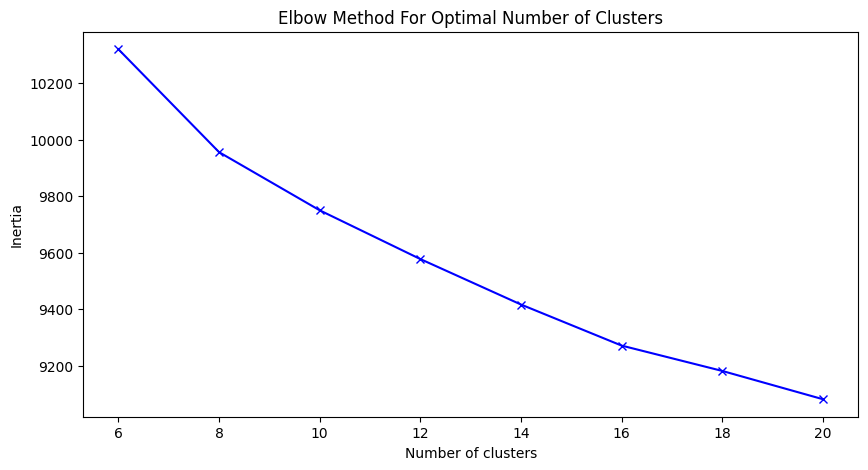

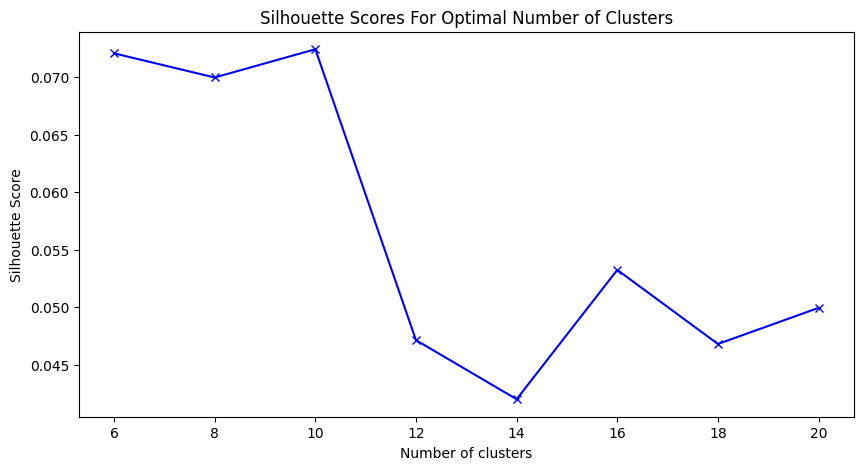

Optimal number of clusters: 10


In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your DataFrame (assuming embedding_df is already loaded)
# embedding_df = pd.read_csv('path_to_your_embeddings.csv')  # or however you load your DataFrame

# Extract the embedding columns (all columns except 'year' and 'CIK')
embedding_columns = embedding_df.columns[:-2]  # Assumes 'year' and 'CIK' are the last two columns

# Extract the data to cluster
embedding_data = embedding_df[embedding_columns].values

# Elbow Method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
# K should vary from 6 to 20 with steps of 2:
K = range(6, 21, 2)  # Try different numbers of clusters from 6 to 20

for k in K:
    print(f"Running KMeans with {k} clusters")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embedding_data, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters based on the plots
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

In [ ]:
et.run_fa()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Sample data to demonstrate the process
# Replace this with your actual data loading code
# embedding_df = pd.read_csv('your_data_file.csv')

# Preserve the columns 'year' and 'CIK'
columns_to_preserve = ['year', 'CIK']
data_for_clustering = embedding_df.drop(columns=columns_to_preserve)

# Initialize KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit and predict the clusters
embedding_df['cluster'] = kmeans.fit_predict(data_for_clustering)

embedding_df.head()

In [ ]:
embedding_df.rename(columns={"cluster": "max_topic"}, inplace=True)
topic_map = embedding_df[['max_topic', 'year', 'CIK']]
# Save topic_map as a CSV to /Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/embeddings_km10
topic_map.to_csv("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/embeddings_km10/topic_map_2006_2022.csv", index=False)

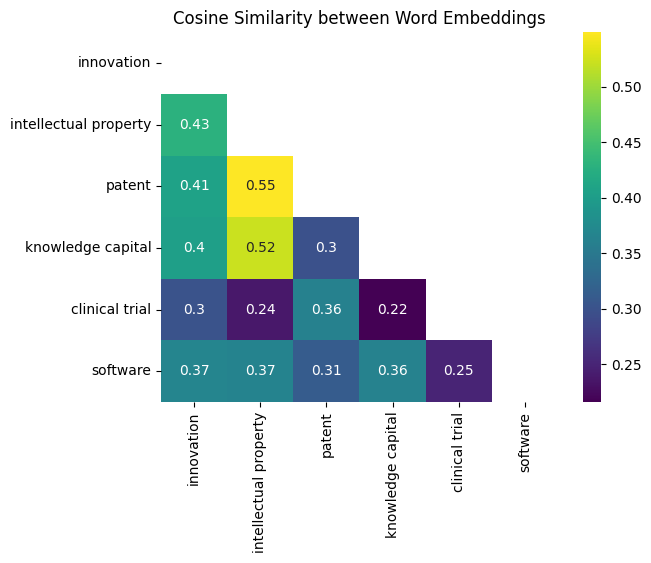

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import embedding_tools as et

# Get embeddings for the words "innovation", "intellectual property", "patent", "knowledge capital", "clinical trial", and "software"
inno_et = et.get_text_embeddings("innovation")
ip_et = et.get_text_embeddings("intellectual property")
patent_et = et.get_text_embeddings("patent")
knowledge_capital_et = et.get_text_embeddings("knowledge capital")
clinical_trial_et = et.get_text_embeddings("clinical trial")
software_et = et.get_text_embeddings("software")

# Stack embeddings into a matrix
embeddings_matrix = np.vstack([inno_et, ip_et, patent_et, knowledge_capital_et, clinical_trial_et, software_et])

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cosine_sim, dtype=bool))

# Create a heatmap with the cosine similarity, masking the upper triangle
words = ["innovation", "intellectual property", "patent", "knowledge capital", "clinical trial", "software"]
sns.heatmap(cosine_sim, annot=True, xticklabels=words, yticklabels=words, cmap='viridis', mask=mask)
plt.title('Cosine Similarity between Word Embeddings')
plt.show()

In [10]:
type(et.get_text_embeddings("intellectual property"))

list

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import embedding_tools as et

# Example embedding DataFrame (assuming you already have your DataFrame `embedding_df`)
# embedding_df = pd.read_csv('your_embedding_dataframe.csv')

# Get the embedding for the expression "intellectual property"
ip_embedding = np.array(et.get_text_embeddings("intellectual property")).reshape(1, -1)

# Function to calculate cosine similarity between row vector A and ip_embedding B
def calculate_cosine_similarity(row):
    vector_a = row.values.reshape(1, -1)
    return cosine_similarity(vector_a, ip_embedding)[0, 0]

# Apply the function to each row in the DataFrame
embedding_df['ip_cs'] = embedding_df.iloc[:, 0:1536].apply(calculate_cosine_similarity, axis=1)

# Display the updated DataFrame
print(embedding_df.head())

# Plot a histogram of the cosine similarity values
# Rename ip_cs to topic_kk:
embedding_df.rename(columns={"ip_cs": "topic_kk"}, inplace=True)
# Save the updated DataFrame to a CSV file
# Create directory if it doesn't exist:
import os
output_dir = "/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/embeddings_km10_ipcs"
os.makedirs(output_dir, exist_ok=True)
embedding_df.rename(columns={"cluster": "max_topic"}, inplace=True)
topic_map = embedding_df[['max_topic', 'topic_kk', 'year', 'CIK']]
# Save topic_map as a CSV to /Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/embeddings_km10
topic_map.to_csv("/Users/pedrovallocci/Documents/PhD (local)/Research/By Topic/Measuring knowledge capital risk/output/embeddings_km10_ipcs/topic_map_2006_2022.csv", index=False)


          0         1         2         3         4         5         6  \
0  0.038537  0.028586  0.041544  0.056358 -0.020069  0.000039  0.010794   
1  0.051025  0.025467  0.045901  0.050241  0.016772  0.010669  0.013246   
2  0.050024  0.021326  0.058239  0.058014 -0.003636  0.031342 -0.011303   
3  0.018462  0.046282  0.066597  0.029193 -0.024047  0.018022  0.036791   
4  0.032682  0.025026  0.052652  0.052423 -0.013277  0.022883  0.033397   

          7         8         9  ...      1530      1531      1532      1533  \
0 -0.031088 -0.022740 -0.018847  ... -0.001595  0.019395 -0.024735  0.000487   
1  0.002260 -0.033213  0.018761  ... -0.011332  0.000704 -0.012319 -0.022634   
2 -0.013005  0.001251  0.016065  ... -0.006766  0.013561 -0.020440 -0.013617   
3  0.005482 -0.022181 -0.011197  ... -0.004099  0.009478 -0.015889 -0.016862   
4 -0.008442 -0.033568  0.012113  ...  0.000851 -0.006989 -0.004139 -0.014798   

       1534      1535  year      CIK  topic_kk     ip_cs  
0  0.0054

KeyError: "['max_topic'] not in index"

In [ ]:
data_for_visualization = embedding_df.drop(columns=['year', 'CIK'])

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_for_visualization.drop(columns=['cluster']))

# Create a DataFrame with the reduced data and the cluster information
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['cluster'] = data_for_visualization['cluster']

# Sample 500 points for visualization
sampled_df = reduced_df.sample(n=500, random_state=42)

# Plot the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(sampled_df['PC1'], sampled_df['PC2'], c=sampled_df['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Embedding Data (Sample of 500 points)')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA
n_components = 20  # Adjust the number of components based on your needs
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(embeddings)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(standardized_embeddings)

# Retrieve the explained variance (eigenvalues)
eigenvalues = pca.explained_variance_
eigenvalues = eigenvalues[:100]
# Plot the Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', markersize=8)
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for PCA')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Optional: Determine the number of components using the Kaiser Criterion (eigenvalues > 1)
n_components_kaiser = np.sum(eigenvalues > 1)
print(f"Number of components according to Kaiser Criterion: {n_components_kaiser}")
# Find the sum of the variance explained by the 20 first components:
print(f"Sum of the variance explained by the {n_components} first components:", sum(pca.explained_variance_ratio_[:n_components]))